# 1. Importing all required libraries and packages

In [1]:
# Import necessary libraries and modules
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating model performance

# Machine learning models
from sklearn.linear_model import (  # Importing various linear regression models
    LinearRegression, 
    RidgeCV, 
    LassoCV, 
    ElasticNet, 
    Ridge, 
    Lasso
)
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression
from sklearn.ensemble import RandomForestRegressor  # For random forest regression
from xgboost import XGBRegressor  # For XGBoost regression model
from sklearn.ensemble import ExtraTreesRegressor # for feature importance

# 2. Loading data

In [2]:
df=pd.read_csv("/kaggle/input/boston-housing-dataset/BostonHousing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Boston Housing Price Dataset: Column Descriptions

Here is a detailed description of each column in the dataset:

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property tax rate per `$10000`.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: \(1000(Bk - 0.63)^2\) where \(Bk\) is the proportion of Black residents by town.
13. **LSTAT**: Percentage of lower status of the population.
14. **MEDV**: Median value of owner-occupied homes in $1000s.

## 2.1 `Dataset exploration`

In [3]:
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_percentage(df)

,Total,Percent
rm,5,0.988142


## 2.2 `Missing Value Handling`
##### Since the percentage of missing data in `rm` column is less that 5%, so impute the missing value with median

In [4]:
df=df.fillna(df.median())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 2.3 `Data Visualization`

##### Display numerical correlations (pearson) between features on heatmap.

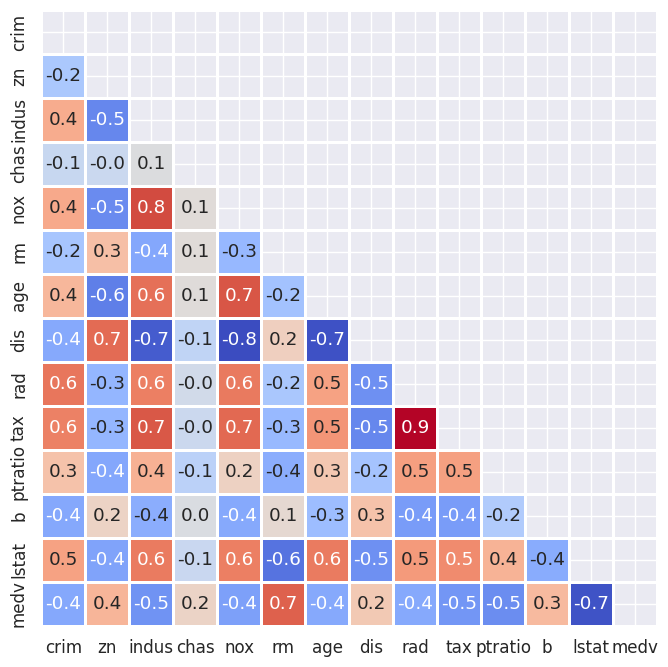

In [6]:
sns.set(font_scale=1.1)
correlation_train = df.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

## 2.4 `Data Preprocessing`

In [7]:
X=df.drop("medv",axis=1,inplace=False)
y=df["medv"]

# dividing the dataset into dependent and independent values
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  2.5 Feature Importance Analysis

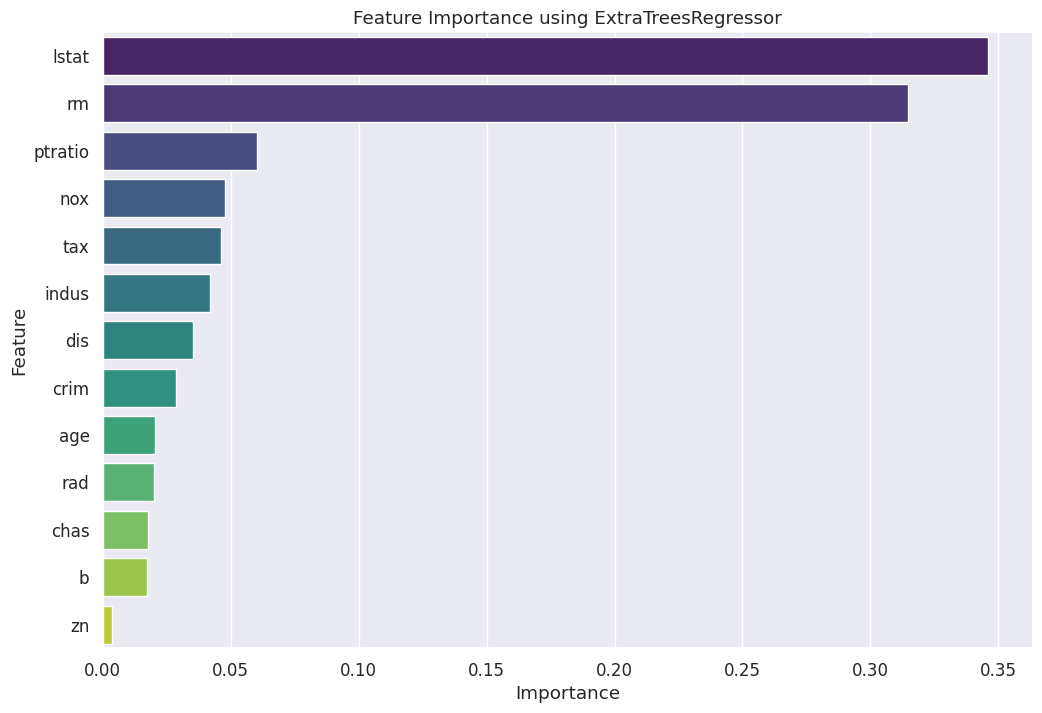

In [10]:
# Initialize and fit the ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names=X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance using ExtraTreesRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The `ExtraTreesRegressor` model provides insights into the relative importance of each feature in predicting the target variable. Below is an analysis based on the computed feature importances:

### Key Insights

### Most Important Features
- **`lstat` (Percentage of Lower Status of the Population)**: With the highest importance score of **0.346133**, this feature is the most influential in predicting the target variable. It significantly impacts the model's predictions.
- **`rm` (Average Number of Rooms per Dwelling)**: This feature also plays a crucial role with an importance score of **0.314553**. It indicates that the number of rooms is a significant predictor of the target variable.

### Moderately Important Features
- **`ptratio` (Pupil-Teacher Ratio by Town)**: This feature has an importance score of **0.060232**. While less significant than `lstat` and `rm`, it still contributes meaningfully to the model.
- **`nox` (Nitric Oxide Concentration)**: With an importance of **0.047947**, this feature indicates environmental quality and its moderate impact on predictions.

### Less Important Features
- **`tax` (Full-Value Property Tax Rate per $10,000)**: This feature has an importance score of **0.046222**, suggesting a lesser but still notable impact.
- **`indus` (Proportion of Non-Retail Business Acres per Town)** and **`dis` (Weighted Distances to Five Boston Employment Centers)**: Both features have lower importance scores but still contribute to the model.

### Least Important Features
- **`zn` (Proportion of Residential Land Zoned for Lots over 25,000 sq. ft.)**: With the lowest importance score of **0.003685**, this feature has minimal impact on predictions.

## 2.6 Conclusion

The `ExtraTreesRegressor` model reveals that `lstat` and `rm` are the most significant predictors in the dataset. These features should be given more focus in any further analysis or model refinement. On the other hand, features like `zn` have minimal influence and might be considered for exclusion in simpler models.

Understanding feature importance helps in feature selection, model interpretation, and improving model performance by focusing on the most impactful features.


# 3. Model Development

##### Creating a function that will train a model and returns the performance results of the model

In [11]:
def evaluate_model(model,X_train, X_test, y_train, y_test):
    
    """Function will take model,X_train,X_test,y_train,y_test and
    train the model on the given data, and returns results in a dict type"""
    results = {}
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results = {'MAE': mae, 'MSE': mse, 'R2': r2}
    return results

##### Creating a dictionary of all the possible model for the given dataset

In [12]:
models_list=[]
results={}

models = {
    'Linear Regression': LinearRegression(),
    'RidgeCV': RidgeCV(),
    'LassoCV': LassoCV(),
    'ElasticNet': ElasticNet(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

##### Training all those model on `X_train_scaled`,`X_test_scaled`,`y_train` and `y_test` data

In [13]:
for model_name,model in models.items():
    models_list.append(model_name)
    results[model_name]=evaluate_model(model,
                                       X_train=X_train_scaled,
                                       X_test=X_test_scaled,
                                       y_train=y_train,
                                       y_test=y_test)

In [14]:
print(results)

{'Linear Regression': {'MAE': 3.211448715550452, 'MSE': 24.456593109406466, 'R2': 0.6665030487253161}, 'RidgeCV': {'MAE': 3.1965735483027693, 'MSE': 24.66057788409171, 'R2': 0.6637214552237332}, 'LassoCV': {'MAE': 3.206321477396406, 'MSE': 24.484888010036933, 'R2': 0.6661172115379912}, 'ElasticNet': {'MAE': 3.440674624005407, 'MSE': 28.382438635092228, 'R2': 0.6129691199342289}, 'Ridge': {'MAE': 3.208655280667632, 'MSE': 24.478759819421693, 'R2': 0.6662007772610611}, 'Lasso': {'MAE': 3.485658360655321, 'MSE': 27.61503314503698, 'R2': 0.6234336760635306}, 'Decision Tree': {'MAE': 2.395098039215686, 'MSE': 10.107156862745098, 'R2': 0.8621759791029907}, 'Random Forest': {'MAE': 2.0644019607843145, 'MSE': 8.077455617647063, 'R2': 0.8898535535799639}, 'XGBoost': {'MAE': 1.964606465545355, 'MSE': 7.124317104991801, 'R2': 0.9028508172090814}}


##### On printing the results dictionary, it seems very unorganised.

##### Creating a `pandas.DataFrame` of the result dictionary

In [15]:
# Convert dictionary to DataFrame
df_results = pd.DataFrame(results).T

# Reset index to have model names as a column
df_results.reset_index(inplace=True)
df_results.rename(columns={'index': 'Model'}, inplace=True)

df_results

,Model,MAE,MSE,R2
0,Linear Regression,3.211449,24.456593,0.666503
1,RidgeCV,3.196574,24.660578,0.663721
2,LassoCV,3.206321,24.484888,0.666117
3,ElasticNet,3.440675,28.382439,0.612969
4,Ridge,3.208655,24.478760,0.666201
5,Lasso,3.485658,27.615033,0.623434
6,Decision Tree,2.395098,10.107157,0.862176
7,Random Forest,2.064402,8.077456,0.889854
8,XGBoost,1.964606,7.124317,0.902851


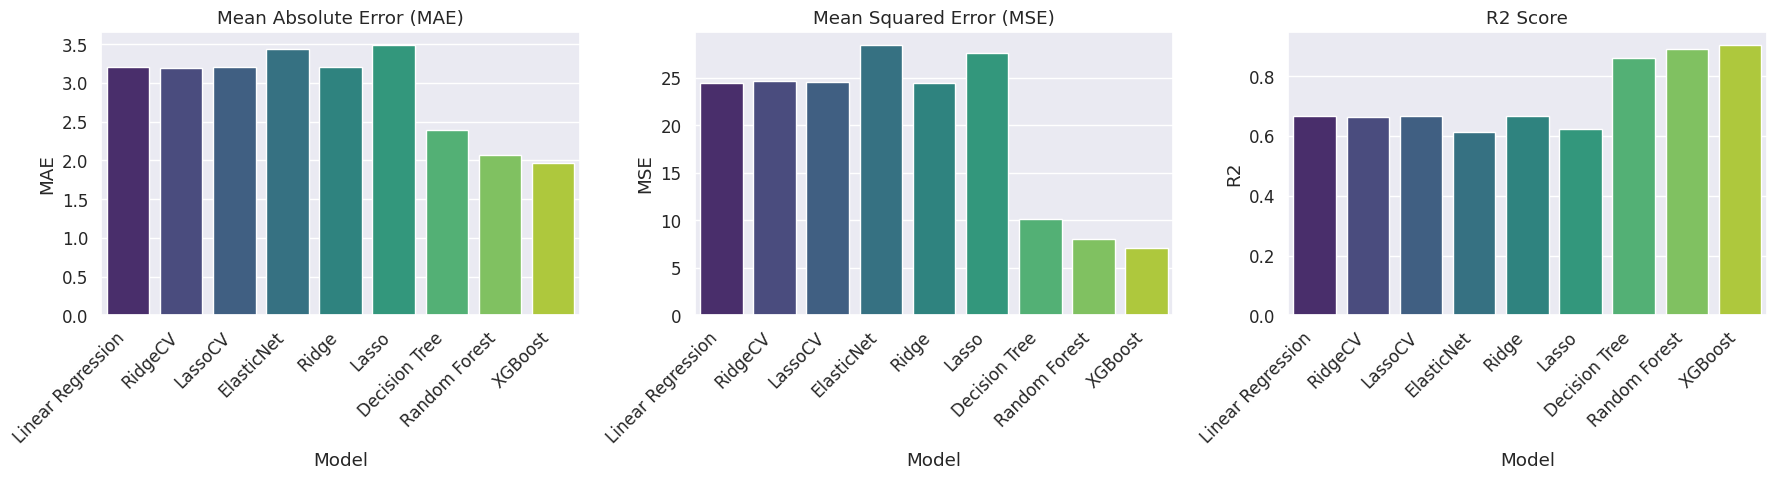

In [16]:
plt.figure(figsize=(18, 5))

# Plot MAE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=df_results, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=df_results, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Plot R2 Score
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=df_results, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('R2 Score')
plt.ylabel('R2')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##  3.1 Evaluation Metrics: MSE, MAE, and R²

When evaluating the performance of regression models, several metrics are commonly used to quantify how well the model predicts the target variable. Three of the most widely used metrics are Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²). 
Each of these metrics provides different insights into the performance of the model.

##### `Mean Squared Error (MSE)`
- **Definition**: MSE measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values.
- **Interpretation**: A lower MSE indicates a better fit of the model to the data. Since the errors are squared, larger errors are penalized more heavily than smaller ones, making MSE sensitive to outliers.

##### `Mean Absolute Error (MAE)`
- **Definition**: MAE measures the average of the absolute errors—that is, the average absolute difference between the actual and predicted values.
- **Interpretation**: A lower MAE indicates a better fit of the model to the data. MAE is less sensitive to outliers compared to MSE because it does not square the errors.

##### `R-squared (R²)`
- **Definition**: R², also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Interpretation**: R² ranges from 0 to 1, where:
  - 0 indicates that the model explains none of the variance in the target variable.
  - 1 indicates that the model explains all the variance in the target variable.
  A higher R² indicates a better fit of the model to the data.

### Metrics Overview
* MAE: Lower values indicate better performance.
* MSE: Lower values indicate better performance, especially in handling larger errors.
* R²: Higher values indicate better performance, as more variance is explained by the model.

## 3.2 Model Evaluation and Selection
### Decision

- **Linear Regression, RidgeCV, LassoCV, Ridge**: All these models have similar performance with relatively high MAE and MSE values and moderate R² scores (~0.66).
- **ElasticNet and Lasso**: These models have slightly higher MAE and MSE values, with lower R² scores compared to the other linear models.
- **Decision Tree**: This model has significantly lower MAE and MSE values compared to the linear models, and a much higher R² score (0.862176).
- **Random Forest**: This model improves further on the Decision Tree with even lower MAE and MSE values and a higher R² score (0.889854).
- **XGBoost**: This model has the lowest MAE and MSE values and the highest R² score (0.902851).

### Conclusion

The **XGBoost** model stands out as the best choice based on the evaluation metrics. It has the lowest MAE (1.964606), the lowest MSE (7.124317), and the highest R² score (0.902851). This indicates that the XGBoost model has the best overall performance, with the smallest prediction errors and the highest proportion of variance explained.


## 3.3 Further Improving the Model Through Hyperparameter Tuning

To achieve optimal performance with the XGBoost model, hyperparameter tuning is a crucial step. Hyperparameters are the settings used to control the training process of the model, and fine-tuning these can significantly enhance the model's performance. Below is a detailed explanation of how hyperparameter tuning can further improve the XGBoost model.

##### Importance of Hyperparameter Tuning

Hyperparameters in XGBoost control various aspects of the model's learning process and complexity. Tuning these hyperparameters helps in finding the right balance between underfitting and overfitting, leading to a more accurate and generalizable model.


## 3.4 Tuning Strategy

**Grid Search**: An exhaustive search over a defined parameter grid. This approach systematically tests all possible combinations of hyperparameters. While thorough, it can be computationally expensive.


#### Approach

A common approach involves starting with a wide range of values for each hyperparameter, then narrowing down based on the results. For instance, begin with default values and adjust one hyperparameter at a time while observing the impact on model performance. This iterative process helps in refining the model's settings for optimal performance.

In [17]:
# Define the XGBoost model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=20, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Predict on the test set using the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Fitting 20 folds for each of 324 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best Score (Negative MSE): -10.354632244675228
MAE: 1.92
MSE: 6.77
R2: 0.91


In [18]:
new_model = {
    'Model': 'XgBoost(Tuned)',
    'MAE': mae,
    'MSE': mse,
    'R2': r2
}
# Append the new row
df_results.loc[len(df_results.index)] = ['XgBoost(Tuned)', mae, mse,r2] 
df_results

,Model,MAE,MSE,R2
0,Linear Regression,3.211449,24.456593,0.666503
1,RidgeCV,3.196574,24.660578,0.663721
2,LassoCV,3.206321,24.484888,0.666117
3,ElasticNet,3.440675,28.382439,0.612969
4,Ridge,3.208655,24.478760,0.666201
5,Lasso,3.485658,27.615033,0.623434
6,Decision Tree,2.395098,10.107157,0.862176
7,Random Forest,2.064402,8.077456,0.889854
8,XGBoost,1.964606,7.124317,0.902851
9,XgBoost(Tuned),1.923273,6.768508,0.907703


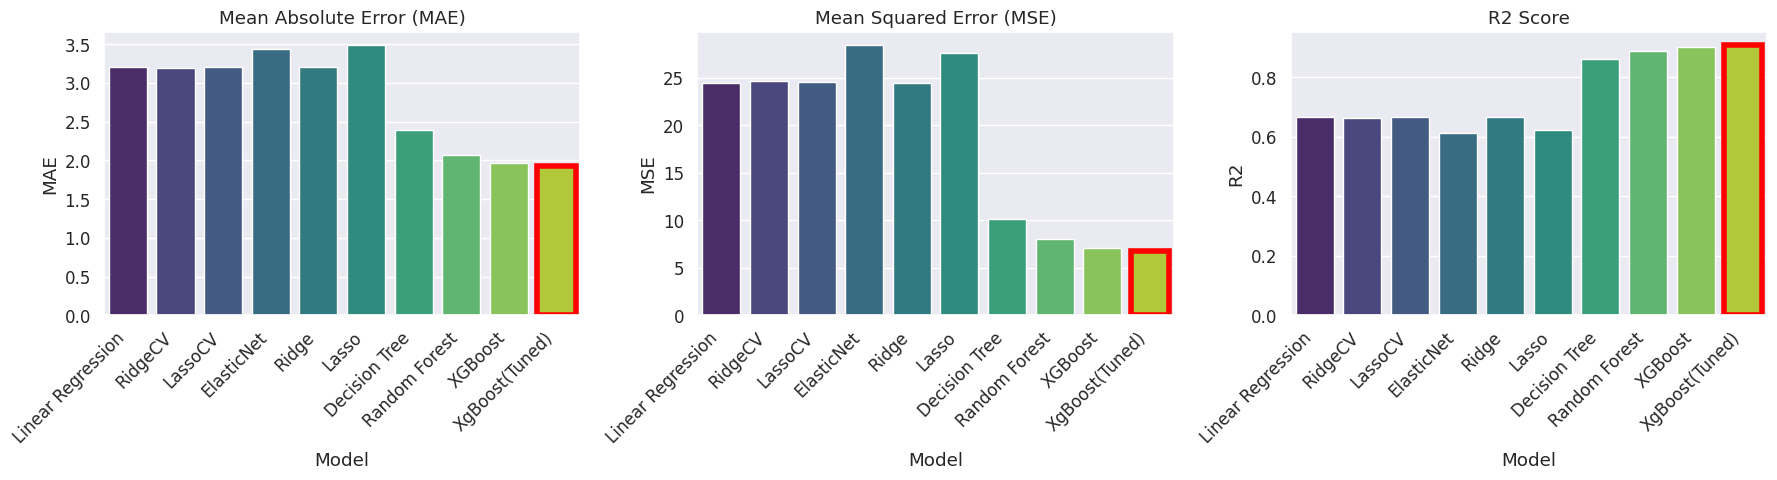

In [19]:
# Set the figure size
plt.figure(figsize=(18, 5))

# Define the color for the last bar
highlight_color = 'red'

# Plot MAE
plt.subplot(1, 3, 1)
barplot = sns.barplot(x='Model', y='MAE', data=df_results, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Highlight the last bar in MAE plot
barplot.patches[-1].set_edgecolor(highlight_color)
barplot.patches[-1].set_linewidth(4)

# Plot MSE
plt.subplot(1, 3, 2)
barplot = sns.barplot(x='Model', y='MSE', data=df_results, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Highlight the last bar in MSE plot
barplot.patches[-1].set_edgecolor(highlight_color)
barplot.patches[-1].set_linewidth(4)

# Plot R2 Score
plt.subplot(1, 3, 3)
barplot = sns.barplot(x='Model', y='R2', data=df_results, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('R2 Score')
plt.ylabel('R2')

# Highlight the last bar in R2 plot
barplot.patches[-1].set_edgecolor(highlight_color)
barplot.patches[-1].set_linewidth(4)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#  4. `Conclusion`
The hyperparameter tuning has resulted in a marginal yet meaningful enhancement in model performance. The tuned XGBoost model not only reduces the prediction errors but also explains a greater proportion of the variance in the target variable. This demonstrates the effectiveness of hyperparameter tuning in optimizing model performance and achieving more accurate and reliable predictions.

# Project Submission

---

## Submitted by

**Name**: Saswat Tulo  
**E-mail**: [saswattulo@gmail.com](mailto:saswattulo@gmail.com)  
**College**: Silicon University Bhubaneswar  
**Reg. No**: 2101209290  

---

*Thank you for reviewing my project!*
